<a href="https://colab.research.google.com/github/someshsingh-7251/House-Price-Predection-On-Poston-Housing-Data/blob/main/HousePricePredectionOnPostonHousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement and demonstrate Linear Regression and variable correlation for House Price
Prediction using sklearn Read the training data from a BostonHouse.CSV file.**

[https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset](http://)

In [ ]:
import pandas as pd                  #Used for data manipulation and analysis.
import numpy as np                   #Used for numerical operations.
import matplotlib.pyplot as plt      #Used for plotting and visulization.
import seaborn as sns                #Used for statistical data visualization.

# Load the dataset
df = pd.read_csv('/kaggle/input/boston-housing-data/BostonHousing.csv')

In [ ]:
df.shape

(506, 14)

In [ ]:
# Display the first few rows of the dataframe
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**df.head(): Displays the first five rows of the DataFrame, providing an initial look at the data.**

In [ ]:
#Check for any missing values in the dataset
##df.isnull().sum(): Checks for missing values in each column and sums them up.

# Check for any missing values in the dataset
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:
#Display the summry statistics of the dataset
#$df.describe(): Provides a summary of statistics for each numerical column in the DataFrame.

df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


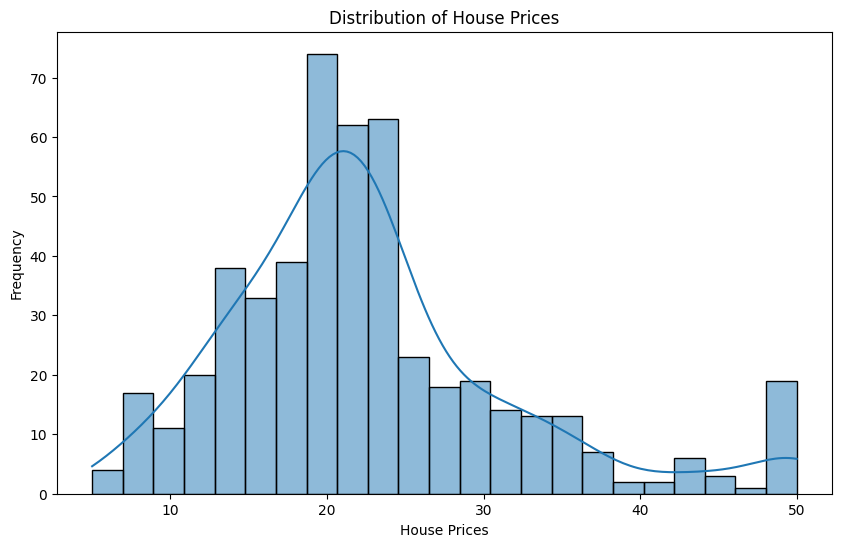

In [ ]:
#Visualize the distribution of the target variable (house prices)
#$sns.histplot(): Plots a histogram for target variable 'MEDV' (Median Value of Owner-Occupied Homes).
#$kde=True: Adds a karnel Density Estimate (KDE) line to histogram for visualizing the data distribution.

plt.figure(figsize=(10,6))
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculate the correlation matrix
##df.corr(): Computes the correlation matrix for the DataFrame, showing the correlation coefficients between variables.

# Calculate the correlation matrix
correlation_matrix = df.corr()

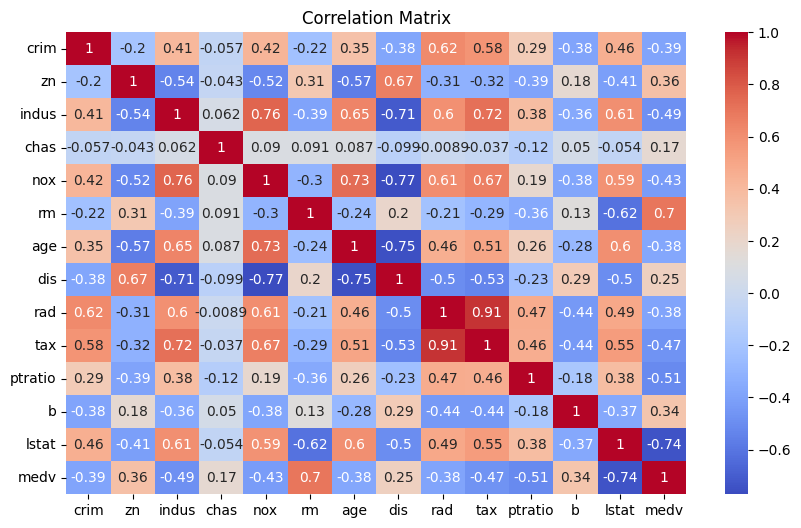

In [ ]:
#Visualize the correlation matrix using a heatmap
##sns.heatmap(): Creates a heatmap to visualize the correlation matrix.
##annot=True: Displays the correlation coefficient values in the heatmap.
##cmap='coolwarm': Sets the color map for the heatmap.

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identify and list the features with the highest positive and negative correlation with the target variable
corr_with_target = correlation_matrix['medv'].sort_values(ascending=False)
print("Features with the highest positive correlation with MEDV:\n", corr_with_target.head())
print("\nFeatures with the highest negative correlation with MEDV:\n", corr_with_target.tail())

Features with the highest positive correlation with MEDV:
 medv    1.000000
rm      0.696169
zn      0.360031
b       0.335387
dis     0.251709
Name: medv, dtype: float64

Features with the highest negative correlation with MEDV:
 nox       -0.428812
tax       -0.471253
indus     -0.486625
ptratio   -0.511897
lstat     -0.737720
Name: medv, dtype: float64


# Prepare the data for training the Linear Regression model

In [ ]:
#Select the features and the target variable
#df.drop(): Removes the target variable 'MEDV' from the features DataFrame X.
#df['MEDV']: Selects the target variable y.

# Select the features and the target variable
X = df.drop('medv', axis=1)
y = df['medv']

**df.drop():** Removes the target variable 'MEDV' from the features DataFrame X.
**df['MEDV']:**  Selects the target variable y.

In [ ]:
#Split the dataset into training and testing sets

##train_test_split(): Splits the data into training and testing sets.
##test_size=0.2: Allocates 20% of the data for testing and 80% for training.
##random_state=42: Ensures reproducibility of the split.

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**train_test_split():** Splits the data into training and testing sets.
**test_size=0.2:** Allocates 20% of the data for testing and 80% for training.
**random_state=42:** Ensures reproducibility of the split.

# Standardize the feature variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**StandardScaler():** Standardizes features by removing the mean and scaling to unit variance.
**fit_transform():** Fits the scaler to the training data and transforms it.
**transform():** Transforms the testing data using the already fitted scaler.

# Train a Linear Regression model using the training data

In [ ]:
#Import and Train the Model
from sklearn.linear_model import LinearRegression

# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.7200277678580314

In [ ]:
#Display the model's coefficients and intercept

# Display the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.77069915  1.03071461  0.27913167  0.56447864 -1.68029622  2.82276603
  0.27220188 -2.88770879  2.54815414 -2.03833449 -1.89508943  1.13266888
 -4.2357555 ]
Intercept: 22.90349999999999


**model.coef_:** Displays the coefficients of the linear model.
**model.intercept_:** Displays the intercept of the linear model.

# Evaluate the Model's Performance

> **Predict the House Prices Using the Testing Data**

In [ ]:
# Predict the house prices using the testing data
y_pred = model.predict(X_test)
print(y_pred)

[10.18296392 22.90028638 15.7250715  32.8687425  23.06305477 11.7105764
 12.82823273 19.68402832 21.37844603 11.6664091  18.68922207 30.07985757
 -1.00929105 25.84534881  2.71769491  8.42105272 24.20065448 18.58158855
 25.35750486 -6.4156406  13.40087749 19.1553702  26.97331835 19.7365225
 22.34723932 16.49474319 28.88299512 25.84032247 18.44473853 21.44179917
 20.47924119 30.65762986 18.03142754 31.7042724  31.32197253 22.39925592
  7.89877816 23.82379177  8.79518229 24.80967266 13.11828624 36.50280369
 14.21716209 30.64314489 13.08150701 28.62892717 30.41900005 20.22002346
 18.50467142 13.74969166 24.00007979 33.05373811 16.31792202 11.83136693
 34.38516527 33.21409913 17.58969598 18.73951491 15.77944095 27.36843691
 20.56962491 41.00811461 20.7069354   7.90355031 26.05404575 28.09290827
 11.99510305  7.63645472 27.23768211 16.49955956 23.31864783 14.72891378
 40.15780832 28.66567671 23.21450156 23.90785079 35.44266626 24.54286797
 20.92244781 16.20464352 27.10551186 28.05804536 21.2

> **Calculate and Display Performance Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# Calculate and display the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 3.2428569148107034
Mean Squared Error (MSE): 20.687720473048508
Root Mean Squared Error (RMSE): 4.548375586189921


> ***Plot Predicted vs. Actual House Prices***

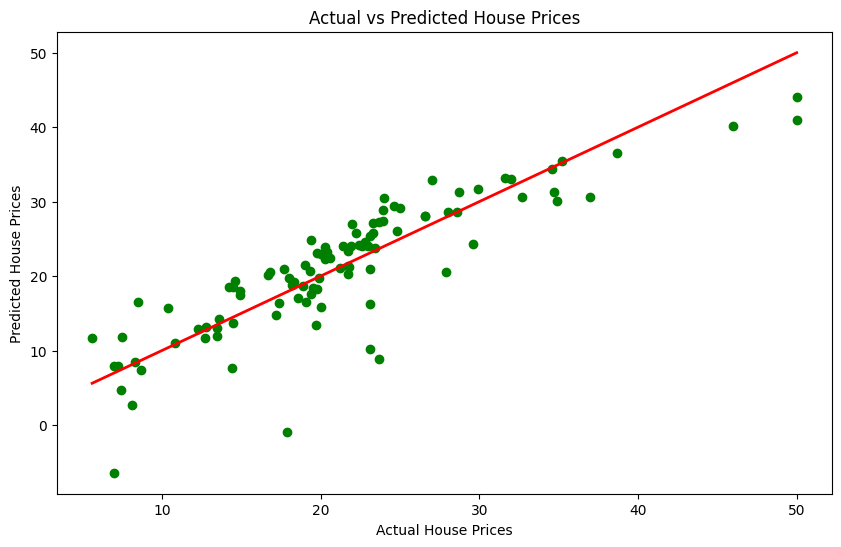

In [ ]:
# Plot the predicted vs actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()